In [142]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

Merge 12 Months of Sales Data

In [8]:
#df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

Read in updated dataframe

In [11]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Drop rows of NaN

In [14]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Find 'Or' and delete it

In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Convert columns to the correct type

In [42]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']).astype('int32')  #Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']).astype('float32')  #Make Float
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1
1,295666,LG Washing Machine,1,1.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1
2,295667,USB-C Charging Cable,1,1.0,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1
3,295668,27in FHD Monitor,1,1.0,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1
4,295669,USB-C Charging Cable,1,1.0,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1


Argument data with additional columns

In [22]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##Add a sales column

In [44]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1.0
1,295666,LG Washing Machine,1,1.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1.0
2,295667,USB-C Charging Cable,1,1.0,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1.0
3,295668,27in FHD Monitor,1,1.0,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1.0
4,295669,USB-C Charging Cable,1,1.0,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1.0


Best Sales Month & Revenue

In [62]:
results = all_data.groupby('Month').sum()

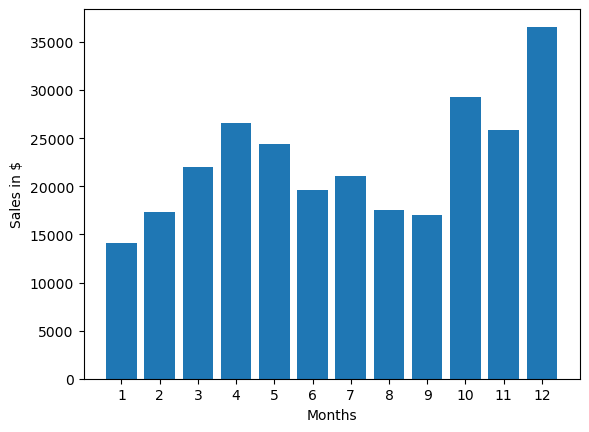

In [66]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Months')
plt.show()

#What city had the highest number of sales

In [77]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + '(' + x.split(',')[2].split(' ')[1] + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1.0,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1.0,New York City (NY)
1,295666,LG Washing Machine,1,1.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,1.0,New York City (NY)
2,295667,USB-C Charging Cable,1,1.0,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,1.0,New York City (NY)
3,295668,27in FHD Monitor,1,1.0,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,1.0,San Francisco (CA)
4,295669,USB-C Charging Cable,1,1.0,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,1.0,Atlanta (GA)


In [80]:
results = all_data.groupby('City').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta (GA),2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,16602.0,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,21184.0
Austin (TX),2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,11153.0,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,14469.0
Boston (MA),2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,22528.0,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,29600.0
Dallas (TX),2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,16730.0,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,21964.0
Los Angeles (CA),2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,33289.0,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,43241.0
New York City (NY),2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,27932.0,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,36106.0
Portland (ME),2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,2750,2750.0,12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,"573 Maple St, Portland, ME 04101163 Washington...",17144,3500.0
Portland (OR),2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,11303,11303.0,12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,"928 12th St, Portland, OR 97035780 Elm St, Por...",70621,14849.0
San Francisco (CA),2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,50239.0,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,65223.0


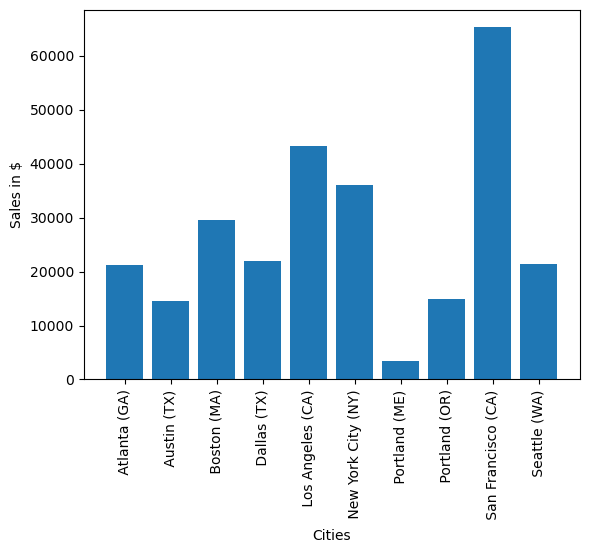

In [98]:
City = [City for City, df in all_data.groupby('City')]

#City = all_data['City'].unique()

plt.bar(City, results['Sales'])
plt.xticks(City, rotation = 'vertical', size = 10)
plt.ylabel('Sales in $')
plt.xlabel('Cities')
plt.show()

What time should we display advertisements to maximise likelihood of customer's buying product?

In [109]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%Y')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1.0,New York City (NY)
1,295666,LG Washing Machine,1,1.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,1.0,New York City (NY)
2,295667,USB-C Charging Cable,1,1.0,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,1.0,New York City (NY)
3,295668,27in FHD Monitor,1,1.0,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,1.0,San Francisco (CA)
4,295669,USB-C Charging Cable,1,1.0,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,1.0,Atlanta (GA)


In [117]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1.0,New York City (NY),0,1
1,295666,LG Washing Machine,1,1.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,1.0,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,1.0,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,1.0,New York City (NY),18,21
3,295668,27in FHD Monitor,1,1.0,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,1.0,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,1.0,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,1.0,Atlanta (GA),12,38


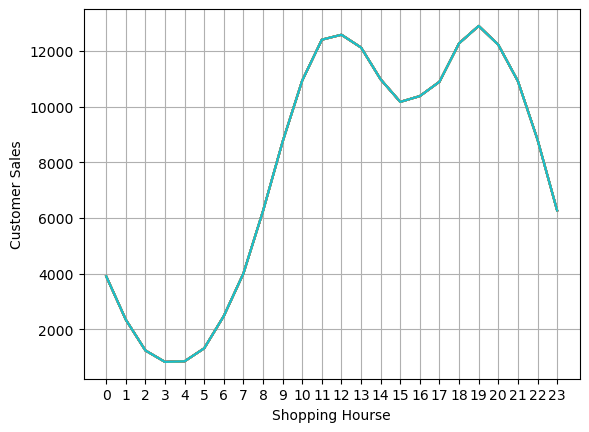

In [129]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Customer Sales')
plt.xlabel('Shopping Hourse')
plt.show()

Most often sold products

In [138]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)

/var/folders/gn/jnr_rnwn7bl11y1r_tfr_4zh0000gn/T/ipykernel_2201/4172465457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [146]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)]

Most sold product and the reason

In [168]:
print(all_data.dtypes)

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
Hour                         int32
Minute                       int32
dtype: object


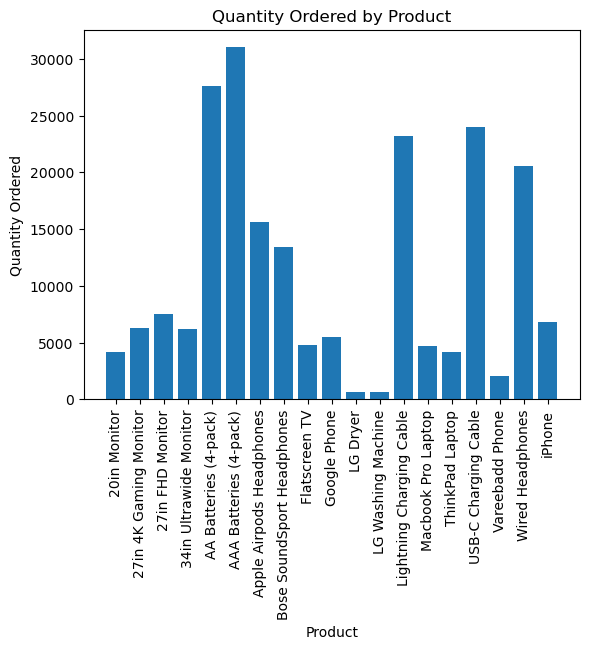

In [208]:
import matplotlib.pyplot as plt

# Group by product and sum the 'Quantity Ordered'
product_group = all_data.groupby('Product').sum(numeric_only=True)

# Extract the 'Quantity Ordered' column directly
quantity_ordered = product_group['Quantity Ordered']

# Create a list of products from the index
products = [product for product in product_group.index]

# Plotting the bar chart
plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for readability
plt.title('Quantity Ordered by Product')
plt.show()

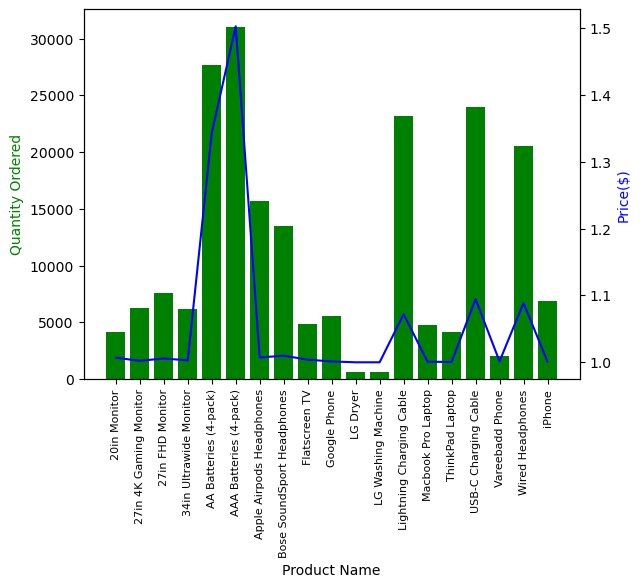

In [230]:
prices = all_data.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
ax1.set_xticks(range(len(products))) 
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()